# Partie III - Implémentation de CNN
Le but de cette partie est de tester différents CNN avec des hyperparamètres définis, en utilisant les fonctions construites dans les autres notebooks.


## A - Installation des librairies et import

#### Installation

In [1]:
# Installation des librairies nécessaires :
! pip install pandas
! pip install matplotlib
! pip install pillow
! pip install tqdm
! pip install import-ipynb
! pip install torch
! pip install torchvision
! pip install scikit-learn

### Import des notebooks

importing Jupyter notebook from dataset_utils.ipynb


,parent_id,parent_name,child_id,child_name
0,Q750752,English Gothic,Q578577,Early English Gothic
1,Q176483,Gothic,Q3111491,Meridional Gothic
2,Q236122,Renaissance,Q3399545,Spanish Renaissance
3,Q840829,Baroque,Q6092662,Italian Baroque
4,Q46261,Romanesque,Q2884586,Italian Romanesque Architecture


,parent_id,parent_name,child_id,child_name
50,Q1810654,Serbo-Byzantine Architecture,Q3501300,Serbo-Byzantine Style (modern architecture)
51,Q46261,Romanesque,Q744373,Romanesque Revival Architecture
52,Q236122,Renaissance,Q502163,Renaissance Revival Architecture
53,Q4198718,Classical Architecture,Q54111,Neoclassical Architecture
54,Q840829,Baroque,Q21564105,Rococo


,img_name,parent_id,parent_name
0,Q2588857_wd0.jpg,Q840829,Baroque
1,Q626388_wd0.jpg,Q840829,Baroque
2,Q11985244_wd0.jpg,Q840829,Baroque
3,Q1561401_wd0.jpg,Q840829,Baroque
4,Q8406909_wd0.jpg,Q840829,Baroque


(1482, 3)

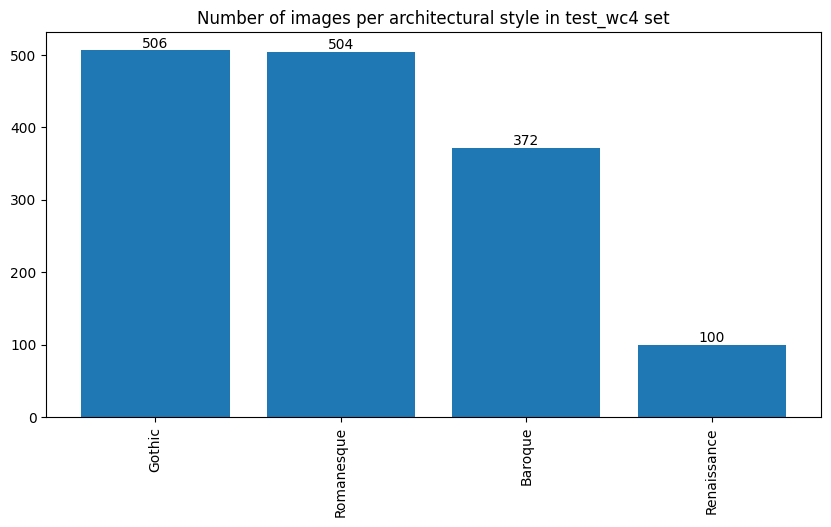

,img_name,parent_id,parent_name
0,Q21716735_wd0.jpg,Q840829,Baroque
1,Q20730233_wd0.jpg,Q840829,Baroque
2,Q2317509_wd0.jpg,Q840829,Baroque
3,Q1897745_wd0.jpg,Q840829,Baroque
4,Q20754132_wd0.jpg,Q840829,Baroque


(5838, 3)

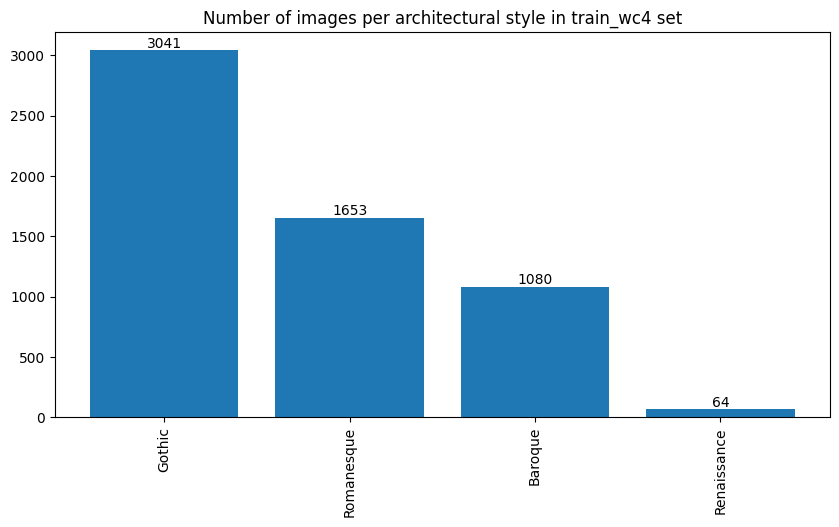

,img_name,parent_id,parent_name
0,Q1415669_wd1.jpg,Q840829,Baroque
1,Q12030410_wd0.jpg,Q840829,Baroque
2,Q12031051_wd0.jpg,Q840829,Baroque
3,Q16320906_wd1.jpg,Q840829,Baroque
4,Q223413_wd0.jpg,Q840829,Baroque


(6044, 3)

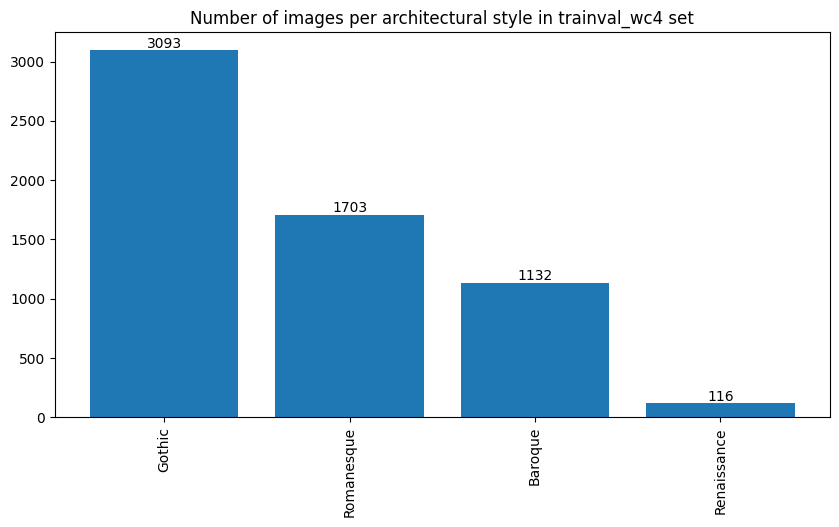

,img_name,parent_id,parent_name
0,Q1415669_wd1.jpg,Q840829,Baroque
1,Q12030410_wd0.jpg,Q840829,Baroque
2,Q12031051_wd0.jpg,Q840829,Baroque
3,Q16320906_wd1.jpg,Q840829,Baroque
4,Q223413_wd0.jpg,Q840829,Baroque


(206, 3)

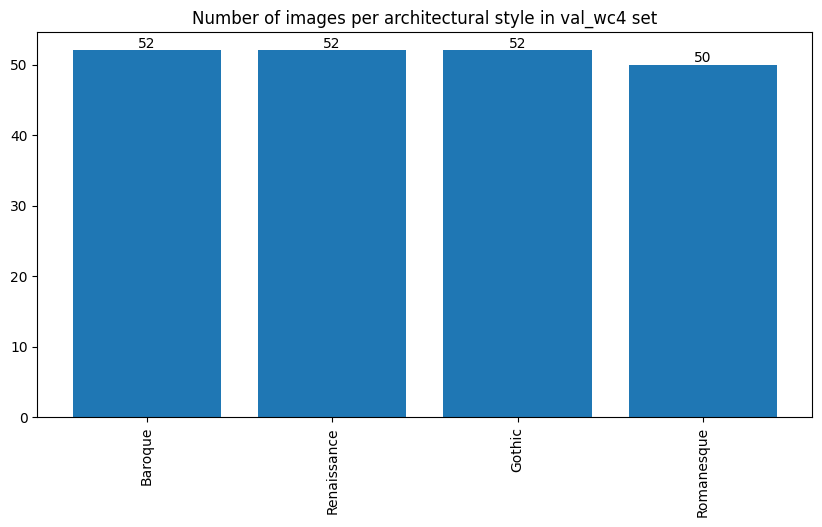

,img_name,parent_id,parent_name
0,Q2588857_wd0.jpg,Q840829,Baroque
1,Q626388_wd0.jpg,Q840829,Baroque
2,Q11985244_wd0.jpg,Q840829,Baroque
3,Q1561401_wd0.jpg,Q840829,Baroque
4,Q8406909_wd0.jpg,Q840829,Baroque


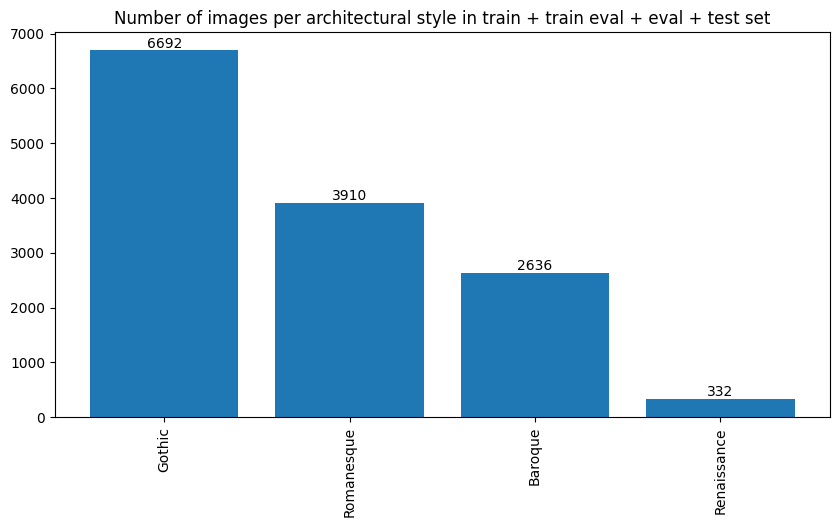

,img_name,parent_id,parent_name
0,Q2588857_wd0.jpg,Q840829,Baroque
1,Q626388_wd0.jpg,Q840829,Baroque
2,Q11985244_wd0.jpg,Q840829,Baroque
3,Q1561401_wd0.jpg,Q840829,Baroque
4,Q8406909_wd0.jpg,Q840829,Baroque


(1722, 3)

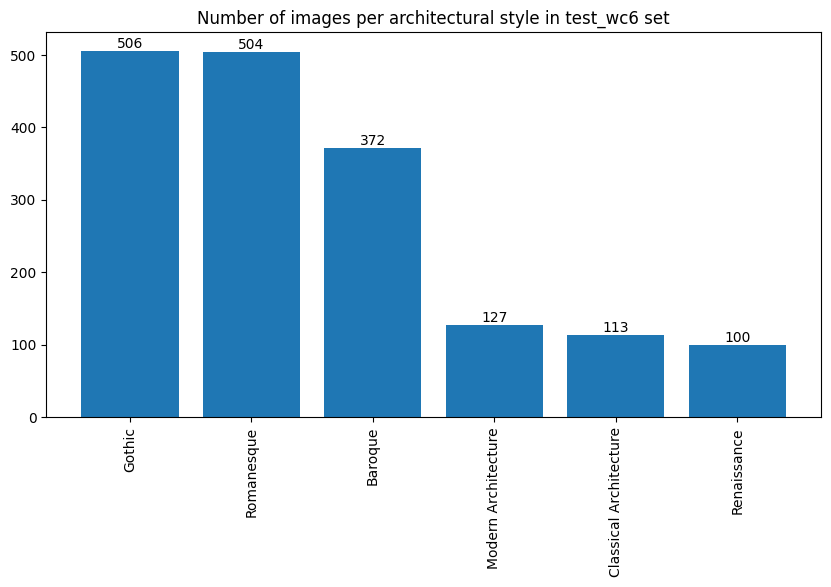

,img_name,parent_id,parent_name
0,Q21716735_wd0.jpg,Q840829,Baroque
1,Q20730233_wd0.jpg,Q840829,Baroque
2,Q2317509_wd0.jpg,Q840829,Baroque
3,Q1897745_wd0.jpg,Q840829,Baroque
4,Q20754132_wd0.jpg,Q840829,Baroque


(6460, 3)

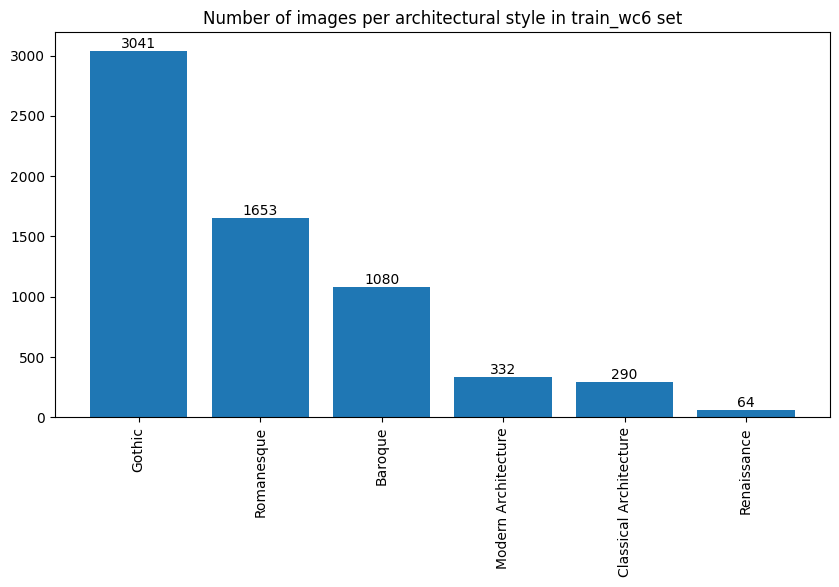

,img_name,parent_id,parent_name
0,Q1415669_wd1.jpg,Q840829,Baroque
1,Q12030410_wd0.jpg,Q840829,Baroque
2,Q12031051_wd0.jpg,Q840829,Baroque
3,Q16320906_wd1.jpg,Q840829,Baroque
4,Q223413_wd0.jpg,Q840829,Baroque


(6766, 3)

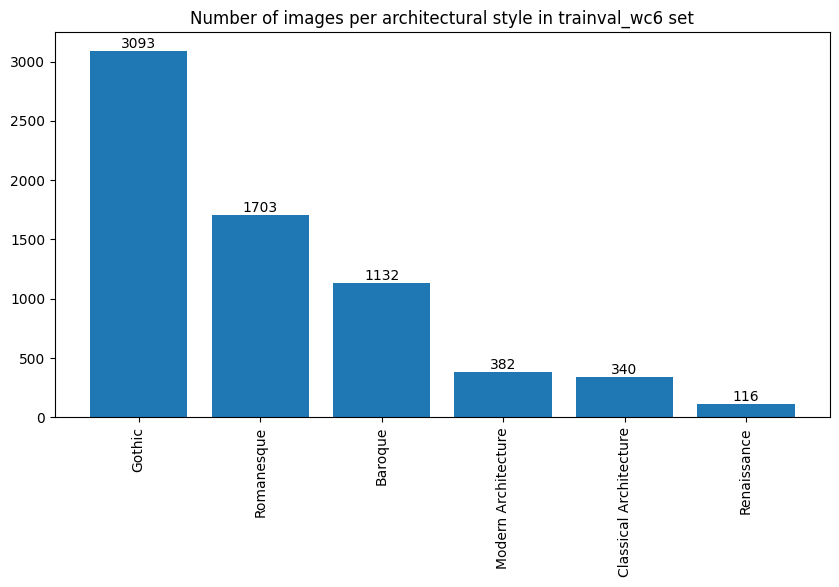

,img_name,parent_id,parent_name
0,Q1415669_wd1.jpg,Q840829,Baroque
1,Q12030410_wd0.jpg,Q840829,Baroque
2,Q12031051_wd0.jpg,Q840829,Baroque
3,Q16320906_wd1.jpg,Q840829,Baroque
4,Q223413_wd0.jpg,Q840829,Baroque


(306, 3)

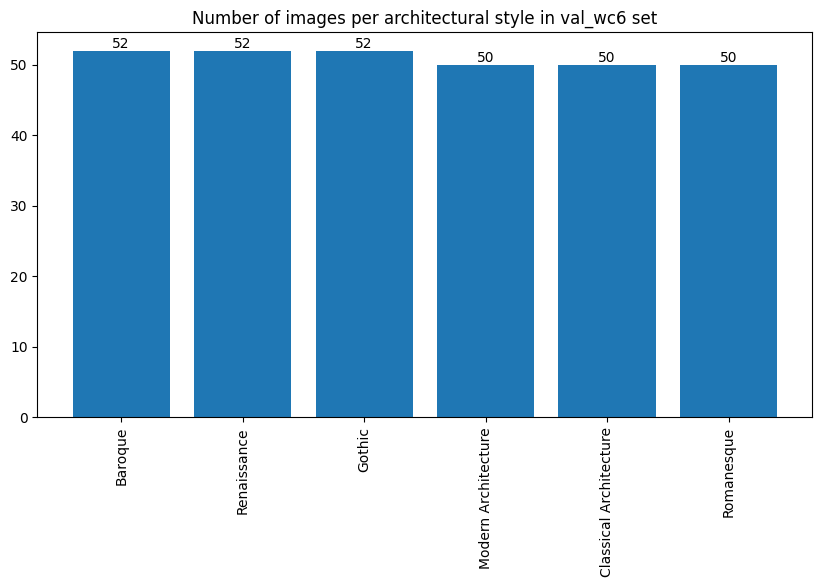

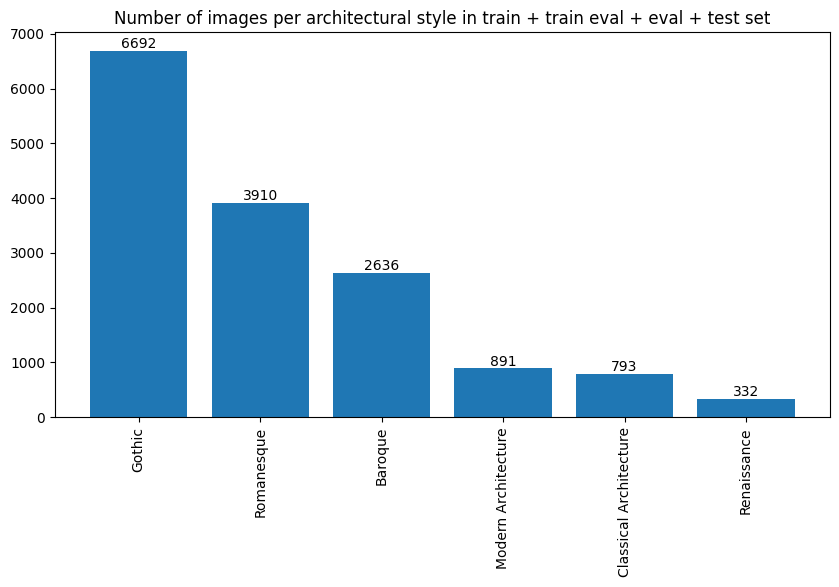

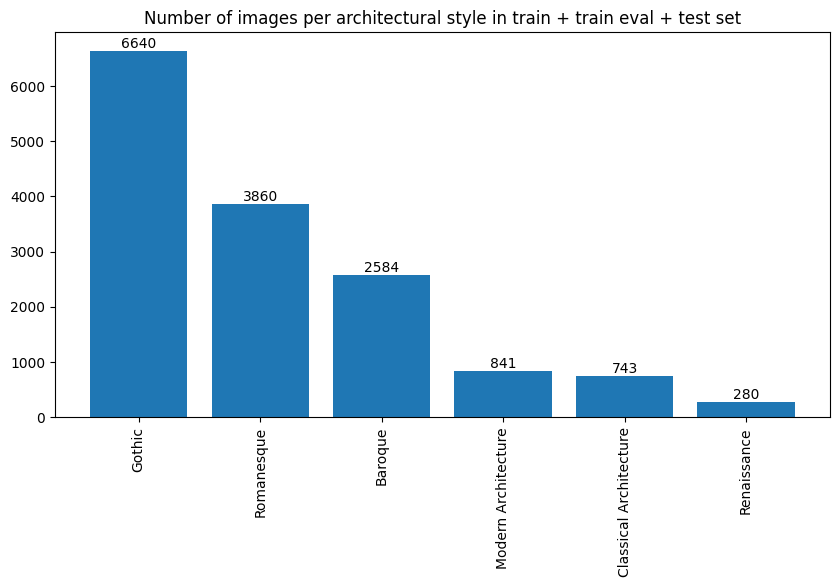

(9616, 3)

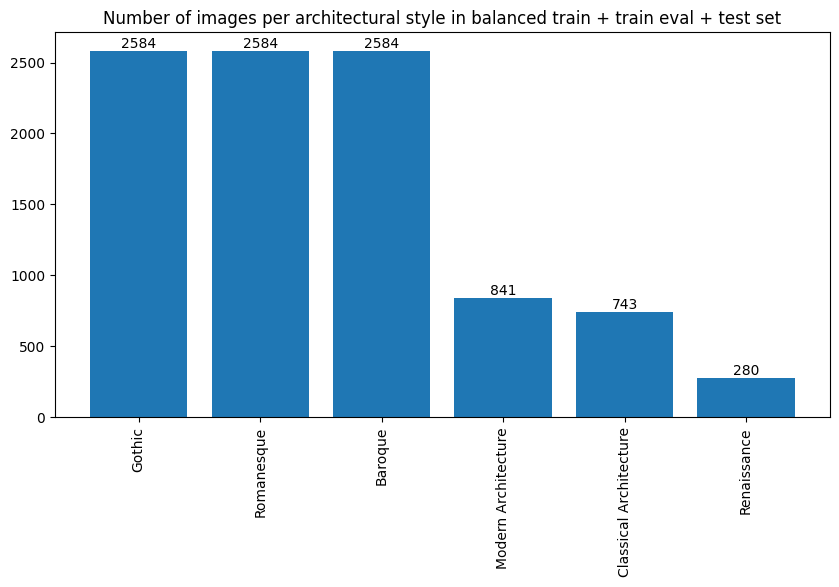

,img_name,parent_id,parent_name
0,Q16857043_wd0.jpg,Q176483,Gothic
1,Q26869615_wd0.jpg,Q176483,Gothic
2,Q2956865_wd0.jpg,Q176483,Gothic
3,Q3584272_wd0.jpg,Q176483,Gothic
4,Q923396_wd0.jpg,Q176483,Gothic


(9616, 3)

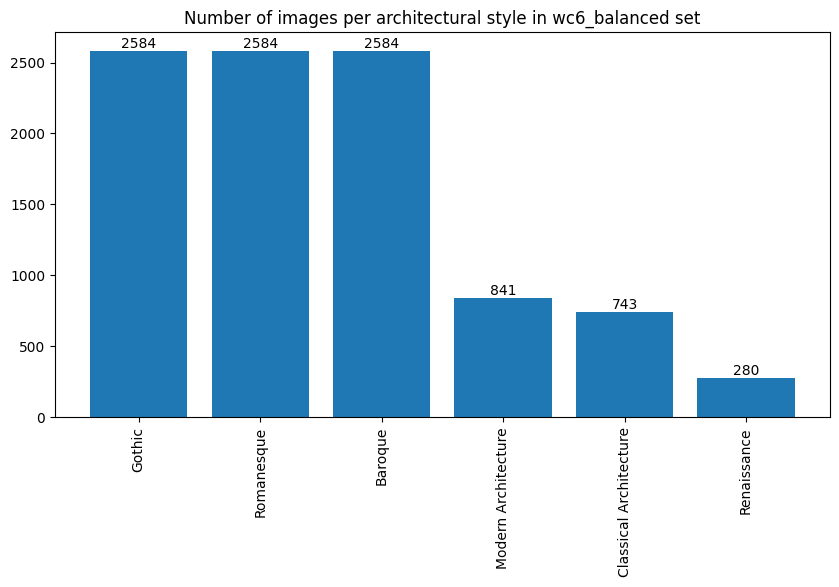

(9616, 3)

importing Jupyter notebook from training_utils.ipynb


In [1]:
# import des librairies nécessaires :
import import_ipynb

# On importe le notebook dataset_utils et sa fonction Subset :
from dataset_utils import Subset

# On importe le notebook training_utils et ses fonctions :
from training_utils import  CustomDataset, ImageProcessor, LabelMap


from torch import torch
import pandas as pd

In [2]:
# On récupère le nom de la classe à partir du label et de la prédiction dans style_names.csv
style_names = pd.read_csv('../dataset_doc/csv/style_names.csv',header=None)
# on nomme les colonnes du dataframe
style_names.columns = ['label','style']
display(style_names)

,label,style
0,Q578577,Early English Gothic
1,Q12049741,Romantic Architecture
2,Q966571,Byzantine Revival Architecture
3,Q6092662,Italian Baroque
4,Q2884586,Italian Romanesque Architecture
...,...,...
116,Q13107150,Czech Baroque
117,Q13526807,Neues Bauen
118,Q4198718,Classical Architecture
119,Q47591,Byzantine Architecture


## B - Paramètres

In [3]:
# Hyperparamètres
batch_size = 4
epochs = 5
learning_rate = 0.001
momentum = 0.9 # paramètre de l'optimiseur SGD

# On importe le module optim
import torch.optim as optim

,img_name,parent_id,parent_name
0,Q16857043_wd0.jpg,Q176483,Gothic
1,Q26869615_wd0.jpg,Q176483,Gothic
2,Q2956865_wd0.jpg,Q176483,Gothic
3,Q3584272_wd0.jpg,Q176483,Gothic
4,Q923396_wd0.jpg,Q176483,Gothic


(9616, 3)

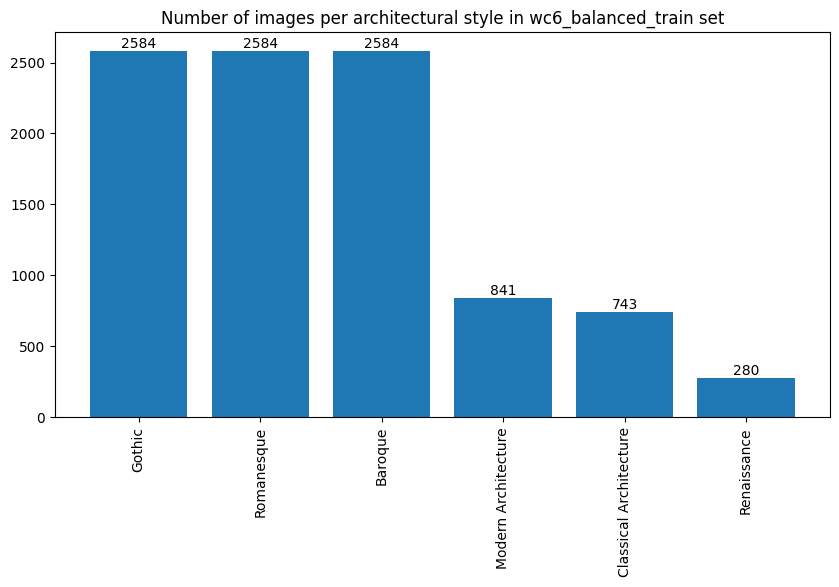

,img_name,parent_id,parent_name
0,Q1415669_wd1.jpg,Q840829,Baroque
1,Q12030410_wd0.jpg,Q840829,Baroque
2,Q12031051_wd0.jpg,Q840829,Baroque
3,Q16320906_wd1.jpg,Q840829,Baroque
4,Q223413_wd0.jpg,Q840829,Baroque


(306, 3)

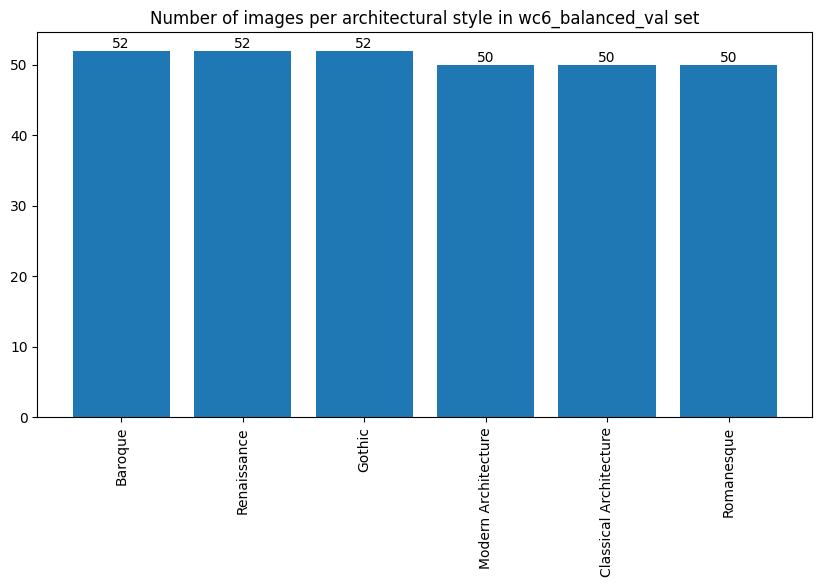

In [4]:
# On créé les Subsets train_set et val_set :
train_set = Subset('../sets/csv/wc6_balanced.csv', 'wc6_balanced_train')
val_set = Subset('../sets/csv/wc6_val.txt.csv', 'wc6_balanced_val')

In [5]:
# On transforme les images en tenseurs : 
img_processor = ImageProcessor()
img_processor.resize_images(train_set.get_df(),'wc6_256_train', 256)


In [6]:
img_processor.resize_images(val_set.get_df(),'wc6_256_eval', 256)

In [7]:
# On créé les tenseurs :
train_tensors = img_processor.generate_img_tensors(train_set.get_df(),'wc6_256_train', 256)


Dictionnaire créé pour le set wc6_256_train de taille : 256x256
Nombre d'images dans le set : 6969


In [8]:
eval_tensors = img_processor.generate_img_tensors(val_set.get_df(),'wc6_256_eval',256)

Dictionnaire créé pour le set wc6_256_eval de taille : 256x256
Nombre d'images dans le set : 306


## C - Trainer

In [9]:
# On créé une fonction d'entrainement du modèle
# Cette fonction possède aussi une barre de progression sous forme de pourcentage avec tqdm
# Cette barre de progression se rempli à chaque epoch

# On importe la librairie tqdm
from tqdm import tqdm

def train_model(model, dataloader, epochs, optimizer, criterion):
    loss_stats = []
    # On parcourt les epochs
    for epoch in range(epochs):

       

        # On affiche l'epoch en cours
        print(f'epoch {epoch+1}/{epochs}')

        # On affiche la barre de progression sous forme de pourcentage sur le notebook
        pbar = tqdm(total=len(dataloader), position=0, leave=True)

        

        # On initialise la running_loss à 0
        running_loss = 0.0

        # On parcourt les batches du dataloader
        for i, data in enumerate(dataloader, 0):

            # On affiche la barre de progression sous forme de pourcentage sur le notebook
            pbar.update(1)

            # On récupère les tenseurs et les labels
            inputs, labels = data

            # On met les gradients à zéro
            optimizer.zero_grad()

            # On fait une prédiction
            outputs = model(inputs)

            # On calcule la fonction de coût
            loss = criterion(outputs, labels)

            # On calcule les gradients
            loss.backward()

            # On met à jour les paramètres
            optimizer.step()

            # Tous les 20 batches, on affiche :
            running_loss += loss.item()
            if i % 200 == 199:    # print every 20 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
                loss_stats.append((running_loss / 200,i,epoch))
                running_loss = 0.0

    # On ferme la barre de progression
    pbar.close()
    
    # On retourne le modèle
    return model, loss_stats

In [10]:
class Trainer:
    def __init__(self, model, dataloader, epochs, optimizer, criterion):
        self.model = model
        self.dataloader = dataloader
        self.epochs = epochs
        self.optimizer = optimizer
        self.criterion = criterion
    
    def train_model(self):
        return train_model(self.model, self.dataloader, self.epochs, self.optimizer, self.criterion)

## D - Tests avec différents modèles

### D.1 - CNN personnalisé

#### Dataset et Dataloader

In [15]:
label_mapper = LabelMap()

# Si le fichier csv label_map.csv existe, on le charge

import os.path
from os import path

if path.exists('../dataset_doc/csv/label_map.csv'):
    label_map = label_mapper.read_label_map('../dataset_doc/csv/label_map.csv')
else:
    # On créé le label_map
    label_map = label_mapper.create_label_map(train_set.get_df())
    


Found label mapping, reading it...
Label mapping is the following :


{'Q176483': 0,
 'Q46261': 1,
 'Q840829': 2,
 'Q236122': 3,
 'Q245188': 4,
 'Q4198718': 5}

In [16]:
# On crée un dataset custom pour le train set
dataset_train = CustomDataset(train_tensors, train_set.get_df(), label_map)

# On créé le DataLoader pour le train set
from torch.utils.data import DataLoader

dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

Maintenant qu'un DataLoader a été créé avec les images et les labels correspondant, nous allons pouvoir implémenter notre premier CNN personnalisé.

#### Définition d'un modèle de CNN personnalisé (2 convolutions)

In [18]:
import torch.nn as nn
import torch.nn.functional as F

# On crée un modèle de réseau de neurones convolutif
class Net(nn.Module):
    def __init__(self, num_classes = 6):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1,stride=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1,stride=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*64*64, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)



    def forward(self, x):
        # Première couche de convolution suivie de ReLU et de max pooling
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        # Deuxième couche de convolution suivie de ReLU et de max pooling
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        # Redimensionner l'activation pour l'entrée de la première couche entièrement connectée
        x = x.view(-1, 32 * 64 * 64)
        # Trois couches entièrement connectées avec ReLU entre chacune
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    

In [19]:
# On initialise le modèle
net = Net()

#### Optimiseur et fonction de coût

In [20]:
# On définit l'optimiseur 

optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# On définit la fonction de coût

criterion = nn.CrossEntropyLoss()

### Entrainement

In [21]:
# On crée un objet Trainer

trainer = Trainer(model=net, dataloader=dataloader_train, epochs=epochs, optimizer=optimizer, criterion=criterion)

In [23]:
# On entraine le modèle :
training_stats = trainer.train_model()

epoch 1/5


  8%|▊         | 202/2404 [00:28<05:03,  7.26it/s]

[1,   200] loss: 1.661


 17%|█▋        | 402/2404 [00:55<04:35,  7.27it/s]

[1,   400] loss: 1.605


 25%|██▌       | 602/2404 [01:22<04:01,  7.46it/s]

[1,   600] loss: 1.586


 33%|███▎      | 802/2404 [01:57<05:18,  5.03it/s]

[1,   800] loss: 1.578


 42%|████▏     | 1002/2404 [02:36<03:53,  6.00it/s]

[1,  1000] loss: 1.557


 50%|████▉     | 1201/2404 [03:40<11:46,  1.70it/s]

[1,  1200] loss: 1.569


 58%|█████▊    | 1401/2404 [05:36<09:33,  1.75it/s]

[1,  1400] loss: 1.571


 67%|██████▋   | 1601/2404 [07:41<08:23,  1.60it/s]

[1,  1600] loss: 1.551


 75%|███████▍  | 1801/2404 [09:52<06:46,  1.48it/s]

[1,  1800] loss: 1.549


 83%|████████▎ | 2002/2404 [11:47<01:04,  6.26it/s]

[1,  2000] loss: 1.573


 92%|█████████▏| 2201/2404 [12:27<00:37,  5.46it/s]

[1,  2200] loss: 1.569


100%|█████████▉| 2402/2404 [13:07<00:00,  4.84it/s]

[1,  2400] loss: 1.545


100%|██████████| 2404/2404 [13:07<00:00,  4.87it/s]

epoch 2/5


  8%|▊         | 202/2404 [00:39<06:55,  5.30it/s]

[2,   200] loss: 1.443


 17%|█▋        | 402/2404 [01:17<06:16,  5.32it/s]

[2,   400] loss: 1.511


 25%|██▌       | 602/2404 [01:55<05:38,  5.32it/s]

[2,   600] loss: 1.416


 33%|███▎      | 802/2404 [02:33<05:10,  5.15it/s]

[2,   800] loss: 1.395


 42%|████▏     | 1002/2404 [03:12<04:27,  5.25it/s]

[2,  1000] loss: 1.383


 50%|█████     | 1202/2404 [03:50<03:48,  5.27it/s]

[2,  1200] loss: 1.331


 58%|█████▊    | 1402/2404 [04:28<03:10,  5.26it/s]

[2,  1400] loss: 1.343


 67%|██████▋   | 1602/2404 [05:07<02:22,  5.64it/s]

[2,  1600] loss: 1.340


 75%|███████▍  | 1802/2404 [05:41<01:41,  5.91it/s]

[2,  1800] loss: 1.235


 83%|████████▎ | 2002/2404 [06:16<01:07,  5.95it/s]

[2,  2000] loss: 1.160


 92%|█████████▏| 2202/2404 [06:50<00:34,  5.83it/s]

[2,  2200] loss: 1.201


100%|█████████▉| 2402/2404 [07:24<00:00,  5.83it/s]

[2,  2400] loss: 1.195


100%|██████████| 2404/2404 [07:24<00:00,  5.37it/s]

epoch 3/5


  8%|▊         | 202/2404 [00:34<06:17,  5.84it/s]

[3,   200] loss: 0.651


 17%|█▋        | 402/2404 [01:13<06:56,  4.81it/s]

[3,   400] loss: 0.632


 25%|██▌       | 602/2404 [01:48<05:19,  5.64it/s]

[3,   600] loss: 0.572


 33%|███▎      | 802/2404 [02:25<04:34,  5.83it/s]

[3,   800] loss: 0.563


 42%|████▏     | 1002/2404 [02:59<03:56,  5.93it/s]

[3,  1000] loss: 0.597


 50%|█████     | 1202/2404 [03:33<03:24,  5.87it/s]

[3,  1200] loss: 0.608


 58%|█████▊    | 1402/2404 [04:08<02:52,  5.80it/s]

[3,  1400] loss: 0.544


 67%|██████▋   | 1601/2404 [04:42<02:46,  4.83it/s]

[3,  1600] loss: 0.532


 75%|███████▍  | 1802/2404 [05:19<01:51,  5.41it/s]

[3,  1800] loss: 0.513


 83%|████████▎ | 2002/2404 [05:54<01:07,  5.97it/s]

[3,  2000] loss: 0.513


 92%|█████████▏| 2202/2404 [06:29<00:33,  5.96it/s]

[3,  2200] loss: 0.524


100%|█████████▉| 2402/2404 [07:02<00:00,  5.91it/s]

[3,  2400] loss: 0.491


100%|██████████| 2404/2404 [07:03<00:00,  5.92it/s]

epoch 4/5


  8%|▊         | 202/2404 [00:33<06:04,  6.05it/s]

[4,   200] loss: 0.152


 17%|█▋        | 402/2404 [01:08<07:48,  4.27it/s]

[4,   400] loss: 0.138


 25%|██▌       | 602/2404 [01:45<05:08,  5.84it/s]

[4,   600] loss: 0.106


 33%|███▎      | 802/2404 [02:24<05:10,  5.16it/s]

[4,   800] loss: 0.147


 42%|████▏     | 1002/2404 [03:04<04:16,  5.47it/s]

[4,  1000] loss: 0.102


 50%|█████     | 1202/2404 [03:44<04:28,  4.48it/s]

[4,  1200] loss: 0.175


 58%|█████▊    | 1402/2404 [04:18<02:48,  5.94it/s]

[4,  1400] loss: 0.134


 67%|██████▋   | 1602/2404 [04:52<02:21,  5.69it/s]

[4,  1600] loss: 0.127


 75%|███████▍  | 1802/2404 [05:25<01:41,  5.95it/s]

[4,  1800] loss: 0.149


 83%|████████▎ | 2002/2404 [05:59<01:07,  5.99it/s]

[4,  2000] loss: 0.145


 92%|█████████▏| 2202/2404 [06:32<00:34,  5.91it/s]

[4,  2200] loss: 0.138


100%|█████████▉| 2402/2404 [07:07<00:00,  5.28it/s]

[4,  2400] loss: 0.190


100%|██████████| 2404/2404 [07:07<00:00,  5.40it/s]

epoch 5/5


  8%|▊         | 202/2404 [00:37<06:00,  6.10it/s]

[5,   200] loss: 0.056


 17%|█▋        | 402/2404 [01:12<05:27,  6.12it/s]

[5,   400] loss: 0.028


 25%|██▌       | 602/2404 [01:46<05:00,  6.00it/s]

[5,   600] loss: 0.048


 33%|███▎      | 801/2404 [03:04<15:08,  1.76it/s]

[5,   800] loss: 0.032


 42%|████▏     | 1002/2404 [04:19<04:10,  5.60it/s]

[5,  1000] loss: 0.022


 50%|█████     | 1202/2404 [04:55<03:31,  5.68it/s]

[5,  1200] loss: 0.036


 58%|█████▊    | 1402/2404 [05:32<03:01,  5.51it/s]

[5,  1400] loss: 0.094


 67%|██████▋   | 1602/2404 [06:06<02:11,  6.11it/s]

[5,  1600] loss: 0.069


 75%|███████▍  | 1802/2404 [06:41<01:45,  5.73it/s]

[5,  1800] loss: 0.069


 83%|████████▎ | 2002/2404 [07:16<01:05,  6.11it/s]

[5,  2000] loss: 0.067


 92%|█████████▏| 2202/2404 [07:50<00:33,  6.06it/s]

[5,  2200] loss: 0.058


100%|█████████▉| 2401/2404 [08:23<00:00,  4.24it/s]

[5,  2400] loss: 0.036


100%|██████████| 2404/2404 [08:24<00:00,  4.77it/s]


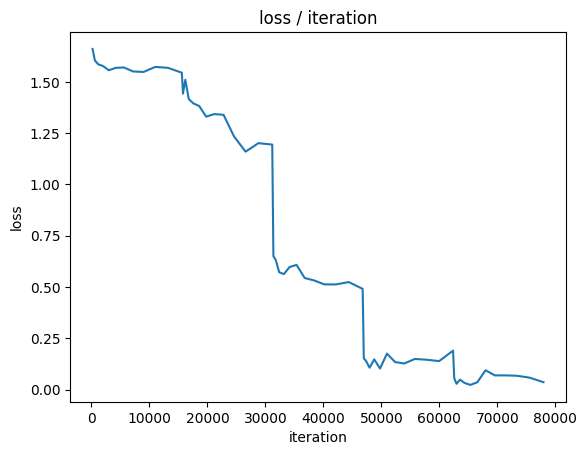

In [24]:
# On utilise training_stats pour afficher la courbe d'apprentissage
import matplotlib.pyplot as plt

model,loss_stats = training_stats

# On affiche la courbe d'apprentissage avec loss / batch

loss,iteration,epoch = zip(*loss_stats)

# Pour chaque i on ajoute les i précédents
new_i = [sum(iteration[:i+1]) for i in range(len(iteration))]

plt.plot(new_i,loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss / iteration')
plt.show()


# On créé un répertoire model + date et heure
import os
from datetime import datetime

# On récupère la date et l'heure
now = datetime.now()

# On créé le répertoire
os.mkdir('model_' + now.strftime("%d_%m_%Y_%H_%M_%S"))

# On sauvegarde le modèle
torch.save(model.state_dict(), 'model_' + now.strftime("%d_%m_%Y_%H_%M_%S") + '/model.pth')

# On sauvegarde loss et iteration dans un fichier csv
df = pd.DataFrame({'loss':loss,'iteration':new_i})

# On sauvegarde le dataframe dans un fichier csv
df.to_csv('model_' + now.strftime("%d_%m_%Y_%H_%M_%S") + '/loss.csv', index=False)




### Tests d'accuracy sur le set d'évaluation

In [25]:
# On génère le label_map pour le val set
dataset_val = CustomDataset(eval_tensors, val_set.get_df(), label_map)

In [26]:
# Maintenant que le modèle est entrainé, on va l'évaluer sur le val set

# On crée le DataLoader pour le val set
dataloader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=True)

# On crée une fonction qui évalue l'accuracy du modèle sur le val set


def evaluate_model(model, dataloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += len(labels)
            correct += (predicted == labels).sum().item()
    return correct / total * 100

In [37]:
# On évalue le modèle sur le val set
evaluate_model(model, dataloader_val)

# On sauvegarde la performance du modèle dans un fichier texte 
f = open('model_' + now.strftime("%d_%m_%Y_%H_%M_%S") + '/performance.txt','w')
f.write('accuracy : ' + str(evaluate_model(model, dataloader_val)) + '%')
f.close()

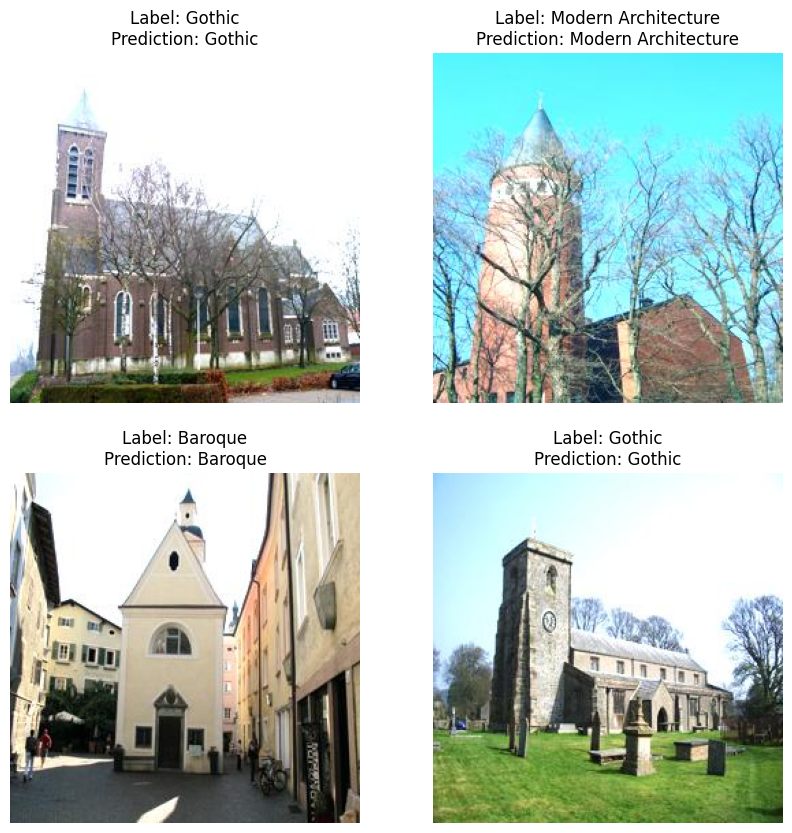

In [42]:
# On pioche 4 images au hasard dans le val set et on affiche leur prédiction

# On récupère les images et les labels
images, labels = next(iter(dataloader_val))

# On affiche les images, les labels et les prédictions sur la même figure
fig = plt.figure(figsize=(10, 10))

for i in range(4):
    # On affiche l'image
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].permute(1, 2, 0))
    # On récupère la prédiction
    with torch.no_grad():
        outputs = model(images[i].unsqueeze(0))
        _, predicted = torch.max(outputs.data, 1)
    # On affiche le label et la prédiction
    # On récupère la key dans le dictionnaire label_map à partir de la valeur
    label = list(label_map.keys())[list(label_map.values()).index(labels[i].item())]
    prediction = list(label_map.keys())[list(label_map.values()).index(predicted.item())]

    # On récupère le nom de la classe à partir du label et de la prédiction dans style_names
    label = style_names[style_names['label'] == label]['style'].item()
    prediction = style_names[style_names['label'] == prediction]['style'].item()
    

    ax.set_title(f'Label: {label}\nPrediction: {prediction}')
    
    ax.axis('off')

plt.show()



